## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve, classification_report, 
                            confusion_matrix, ConfusionMatrixDisplay)

from sklearn.feature_selection import chi2
from scipy.stats import chi2 as stats_chi2

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)

## Training data

In [3]:
df = pd.read_csv("Train_60/Train_60/X_Train_Data_Input.csv")
y = pd.read_csv("Train_60/Train_60/Y_Train_Data_Target.csv")

In [4]:
df = df.merge(y, on="ID")
df = df.set_index("ID")
df.head()

Column0  Column1   Column2  Column3   
ID                                                                      
ad1a67e4cbddc767a3456b0d94299b9e   2.0000     2495 3726.0000   0.6781  \
7246d2f76ac0c217ec25e72ea5f014cb   0.0000     2495 3454.0000   0.4526   
22ba388e7dd14c13342c49e75fc29dda   2.0000     2495 4543.0000  -1.5775   
59f9b981472d97342587fb3e6392aeb1   0.0000      211   59.0000      NaN   
f6317cf7ecf126859804eddff279aead   0.0000      718  950.0000  -2.0286   

                                  Column4  Column5  Column6  Column7  Column8   
ID                                                                              
ad1a67e4cbddc767a3456b0d94299b9e   0.7014  -0.0075   0.4342  -0.0156   0.6063  \
7246d2f76ac0c217ec25e72ea5f014cb   0.7014  -0.0075   1.5550  -0.0156   0.3299   
22ba388e7dd14c13342c49e75fc29dda  -1.4295  -0.0075  -0.4079  -0.0156  -0.7750   
59f9b981472d97342587fb3e6392aeb1      NaN      NaN  -0.4079  -0.0156  -0.7750   
f6317cf7ecf126859804eddff279aead  -1.8557      NaN  -0.4079  -0.0156  -0.7750   

                                  Column9  ...  Column13  Column14  Column15   
ID                                         ...                                 
ad1a67e4cbddc767a3456b0d94299b9e      NaN  ...         0    0.0014    0.0034  \
7246d2f76ac0c217ec25e72ea5f014cb      NaN  ...         0    0.0014    0.0034   
22ba388e7dd14c13342c49e75fc29dda      NaN  ...         1    0.0014    0.0034   
59f9b981472d97342587fb3e6392aeb1      NaN  ...         0       NaN    0.0034   
f6317cf7ecf126859804eddff279aead      NaN  ...         0       NaN    0.0034   

                                  Column16  Column17  Column18  Column19   
ID                                                                         
ad1a67e4cbddc767a3456b0d94299b9e    0.0000         0    0.0000         0  \
7246d2f76ac0c217ec25e72ea5f014cb    0.0000         0    0.0000         0   
22ba388e7dd14c13342c49e75fc29dda    0.0000         0    0.0000         0   
59f9b981472d97342587fb3e6392aeb1    0.0000         0    1.0000         0   
f6317cf7ecf126859804eddff279aead    0.0000         0    0.0000         0   

                                  Column20  Column21  target  
ID                                                            
ad1a67e4cbddc767a3456b0d94299b9e         0         0       0  
7246d2f76ac0c217ec25e72ea5f014cb         0         0       0  
22ba388e7dd14c13342c49e75fc29dda         0         0       0  
59f9b981472d97342587fb3e6392aeb1         0         0       1  
f6317cf7ecf126859804eddff279aead         0         0       0  

[5 rows x 23 columns]

In [5]:
df.shape

(785133, 23)

In [6]:
df.nunique()

Column0         19
Column1       2564
Column2       9424
Column3         47
Column4         47
Column5     148334
Column6     157264
Column7     166513
Column8     355728
Column9      49650
Column10         2
Column11         2
Column12         2
Column13         2
Column14     42362
Column15     66302
Column16         3
Column17       153
Column18        11
Column19         2
Column20         2
Column21         2
target           2
dtype: int64

In [7]:
for col in ['Column0', 'Column3', 'Column4', 'Column16', 'Column18', 'Column17']:
    sorted_lst = sorted(df[col].dropna().unique())
    print(f"{col}: \n{sorted_lst}\n")

Column0: 
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]

Column3: 
[-2.028572085775468, -1.8030127921416368, -1.7825074018111655, -1.7579009334147628, -1.7278263609305409, -1.690233145324587, -1.6418990109748477, -1.577453498506724, -1.5364427178474056, -1.487229781054058, -1.4270806360856143, -1.351894204873706, -1.2903780338833748, -1.2552259361742275, -1.2165586286933536, -1.1263349112406875, -1.044313349919344, -1.013555264422825, -0.9458874763326488, -0.9007756176049626, -0.8685528613736075, -0.825589186395761, -0.7982486659553131, -0.6752163239719442, -0.5521839819885753, -0.5248434615481276, -0.4818797865702807, -0.449657030338926, -0.4045451716112396, -0.3368773835210634, -0.3061192980245447, -0.2240977367032008, -0.133874019250535, -0.095206711769661, -0.0600546140605137, 0.0014615569298173, 0.0766479881417255, 0.1367971331101698, 0.1860100699035171, 0.2270208505628355, 0.2914663630309589, 0.3398004973806982, 0.3773937

In [8]:
# classifying columns into numeric and categorical columns
binary_cols = ["Column10", "Column11", "Column12", "Column13", "Column19", "Column20", "Column21"]
cat_cols = ["Column0", "Column16", "Column18"]
target_col = ["target"]
numeric_cols = list((set(binary_cols)|set(cat_cols)|set(target_col))^set(df.columns))
numeric_cols

['Column6',
 'Column1',
 'Column8',
 'Column4',
 'Column7',
 'Column2',
 'Column9',
 'Column5',
 'Column3',
 'Column15',
 'Column14',
 'Column17']

In [9]:
df[numeric_cols].describe()

Column6     Column1     Column8     Column4     Column7     Column2   
count 781283.0000 785133.0000 781283.0000 657423.0000 785133.0000 785133.0000  \
mean      -0.0007   1321.7886     -0.0002     -0.0009      0.0007   2951.2794   
std        0.9990    907.2680      1.0568      1.0003      1.0459   2143.1401   
min       -0.4079  -1080.0000     -0.7750     -1.8557     -0.0156    -47.0000   
25%       -0.4079    515.0000     -0.7750     -0.5772     -0.0156   1129.0000   
50%       -0.4079   1173.0000      0.1221      0.7014     -0.0156   2709.0000   
75%       -0.3677   2435.0000      0.6255      0.7014     -0.0156   4472.0000   
max       14.9858   2499.0000    323.9925      0.7014    201.6879  10290.0000   

         Column9     Column5     Column3    Column15    Column14    Column17  
count 52996.0000 617953.0000 658830.0000 768677.0000 419430.0000 785133.0000  
mean      0.0052     -0.0004     -0.0002     -0.0008     -0.0009      0.2701  
std       1.1111      1.0153      0.9999      1.2834      1.2912      3.1282  
min      -0.0886     -0.0075     -2.0286  -1091.5459   -832.7496      0.0000  
25%      -0.0865     -0.0075     -0.6752      0.0034      0.0014      0.0000  
50%      -0.0818     -0.0075      0.6781      0.0034      0.0014      0.0000  
75%      -0.0631     -0.0075      0.6781      0.0034      0.0014      0.0000  
max     133.9118    551.4211      0.6781      0.0127      8.5144    728.0000

In [10]:
df.isnull().sum()

Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

In [11]:
df['target'].value_counts()

target
0    711100
1     74033
Name: count, dtype: int64

## Testing data

In [12]:
df_final_test = pd.read_csv("Test_20/Test_20/X_Test_Data_Input.csv")
y_final_test = pd.read_csv("Test_20/Test_20/Y_Test_Data_Target.csv")

In [13]:
df_test = df_final_test.merge(y_final_test, on="ID")

In [14]:
df_test.head()

ID  Column0  Column1   Column2  Column3   
0  07cf2025382f6325b316e128b1b90999   1.0000     1986   53.0000   0.6781  \
1  eb972eb3a1f8d0d1a13f45e7c07d37d4   2.0000     1579   12.0000   0.6781   
2  ee35e164b3ddc25a9f40243b81ad290d   0.0000      898 3817.0000  -2.0286   
3  28229ccd7bad7dd83324a4175a7e0531   0.0000       79 3449.0000  -0.6752   
4  2f94873da2c332d28f111742818e0fbb   1.0000      646 6510.0000  -2.0286   

   Column4  Column5  Column6  Column7  Column8  ...  Column13  Column14   
0   0.7014  -0.0075  -0.4079  -0.0156   0.5549  ...         1    0.0014  \
1   0.7014  -0.0075  -0.4079  -0.0156   0.1421  ...         0    0.0014   
2  -1.8557      NaN  -0.4079  -0.0156  -0.7750  ...         0       NaN   
3  -0.5772  -0.0075   0.0040  -0.0156   0.6353  ...         1    0.0014   
4  -1.8557      NaN  -0.4079  -0.0154  -0.7750  ...         1       NaN   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21   
0    0.0034    0.0000         0    0.0000         0         0         0  \
1    0.0034    0.0000         0    0.0000         0         0         0   
2    0.0034    0.0000         0    0.0000         0         0         0   
3    0.0034    0.0000         0    0.0000         0         0         0   
4    0.0034    0.0000         0    0.0000         0         0         0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 24 columns]

## Initial model

Building initial model for feature selection and measuring the performance of raw data.

I would be using both **RandomForest** and **XGBoost** as it would give a more comprehensive understanding of feature importance.

In [15]:
def build_model(df):
    X = df.drop(columns=['target'])
    X.fillna(X.mean(), inplace=True)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False
    )
    
    xgb_model.fit(X_train, y_train)    
    y_pred_xgb = xgb_model.predict(X_test)


    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Confusion Matrix for XGBoost
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
    disp_xgb.plot(ax=axes[0], colorbar=False)
    axes[0].set_title('XGBoost Confusion Matrix')

    # Confusion Matrix for Random Forest
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
    disp_rf.plot(ax=axes[1], colorbar=False)
    axes[1].set_title('Random Forest Confusion Matrix')
    
    plt.show()
    
    # Feature Importance for XGBoost
    xgb_importances = xgb_model.feature_importances_
    xgb_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_importances
    }).sort_values(by='Importance', ascending=False)

    # Feature Importance for Random Forest
    rf_importances = rf_model.feature_importances_
    rf_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_importances
    }).sort_values(by='Importance', ascending=False)

    
    print('\n--- XGBoost Feature Importance ---')
    print(xgb_importance_df)
    print('\n--- Random Forest Feature Importance ---')
    print(rf_importance_df)

    # Print classification reports
    print('\n--- XGBoost Classification Report ---')
    print(classification_report(y_test, y_pred_xgb))
    print()
    print('\n--- Random Forest Classification Report ---')
    print(classification_report(y_test, y_pred_rf))

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


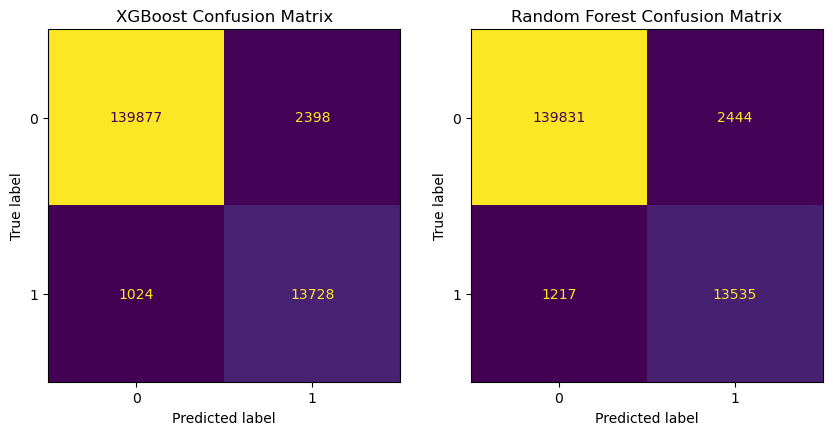


--- XGBoost Feature Importance ---
     Feature  Importance
18  Column18      0.9285
1    Column1      0.0140
7    Column7      0.0102
17  Column17      0.0083
3    Column3      0.0055
4    Column4      0.0053
19  Column19      0.0034
14  Column14      0.0031
6    Column6      0.0029
5    Column5      0.0023
8    Column8      0.0022
0    Column0      0.0021
12  Column12      0.0020
20  Column20      0.0017
10  Column10      0.0014
13  Column13      0.0014
21  Column21      0.0011
2    Column2      0.0011
15  Column15      0.0010
11  Column11      0.0010
16  Column16      0.0009
9    Column9      0.0007

--- Random Forest Feature Importance ---
     Feature  Importance
18  Column18      0.5198
1    Column1      0.1854
2    Column2      0.0614
17  Column17      0.0559
4    Column4      0.0268
3    Column3      0.0249
7    Column7      0.0247
8    Column8      0.0214
19  Column19      0.0179
5    Column5      0.0110
6    Column6      0.0100
14  Column14      0.0094
0    Column0      0.00

In [16]:
build_model(df)

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


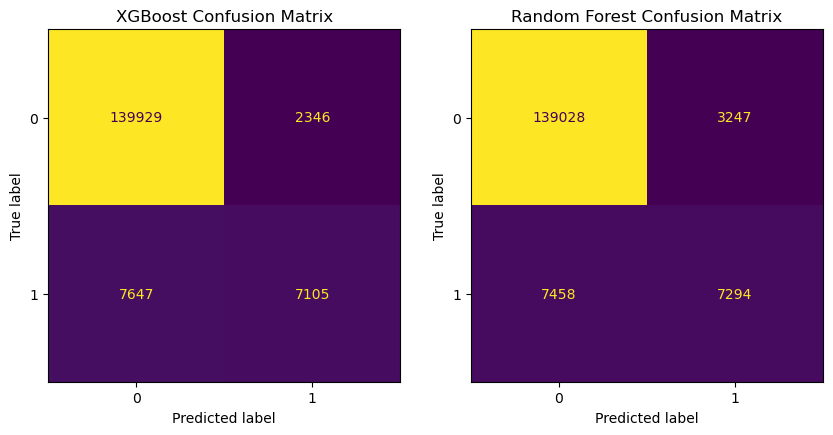


--- XGBoost Feature Importance ---
     Feature  Importance
17  Column17      0.3249
1    Column1      0.2325
19  Column20      0.0864
20  Column21      0.0669
18  Column19      0.0452
4    Column4      0.0372
15  Column15      0.0281
5    Column5      0.0268
6    Column6      0.0223
3    Column3      0.0218
9    Column9      0.0159
12  Column12      0.0155
14  Column14      0.0133
0    Column0      0.0129
8    Column8      0.0113
13  Column13      0.0095
2    Column2      0.0082
11  Column11      0.0074
7    Column7      0.0072
10  Column10      0.0046
16  Column16      0.0021

--- Random Forest Feature Importance ---
     Feature  Importance
1    Column1      0.3789
2    Column2      0.2201
17  Column17      0.0894
4    Column4      0.0540
3    Column3      0.0473
8    Column8      0.0401
18  Column19      0.0252
5    Column5      0.0240
7    Column7      0.0231
6    Column6      0.0211
15  Column15      0.0165
14  Column14      0.0160
0    Column0      0.0118
19  Column20      0.00

In [17]:
# Column18 has quite high feature importance 
build_model(df.drop(columns="Column18"))

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


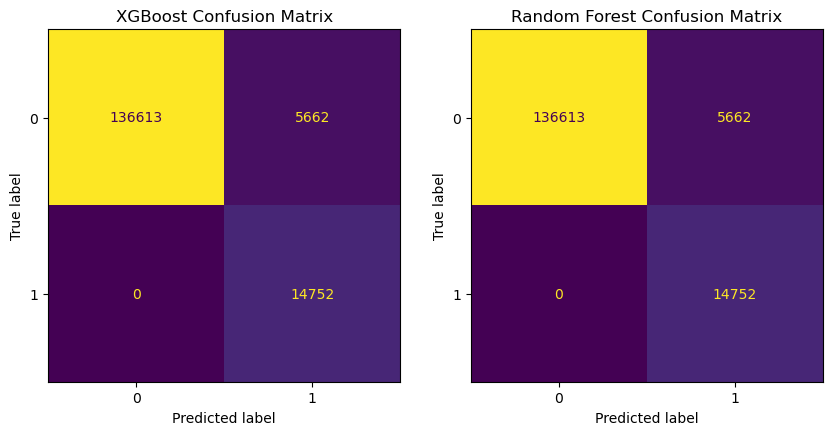


--- XGBoost Feature Importance ---
    Feature  Importance
0  Column18      1.0000

--- Random Forest Feature Importance ---
    Feature  Importance
0  Column18      1.0000

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    142275
           1       0.72      1.00      0.84     14752

    accuracy                           0.96    157027
   macro avg       0.86      0.98      0.91    157027
weighted avg       0.97      0.96      0.97    157027



--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    142275
           1       0.72      1.00      0.84     14752

    accuracy                           0.96    157027
   macro avg       0.86      0.98      0.91    157027
weighted avg       0.97      0.96      0.97    157027



In [18]:
build_model(df[["Column18", "target"]])

In [19]:
for value in df["Column18"].unique():
    print("\n", value)
    print(df[df['Column18']==value]['target'].value_counts())


 0.0
target
0    682726
Name: count, dtype: int64

 1.0
target
1    68309
0    25293
Name: count, dtype: int64

 2.0
target
1    4076
0    2145
Name: count, dtype: int64

 3.0
target
1    982
0    526
Name: count, dtype: int64

 7.0
target
1    52
0    28
Name: count, dtype: int64

 6.0
target
1    75
0    53
Name: count, dtype: int64

 4.0
target
1    311
0    199
Name: count, dtype: int64

 5.0
target
1    156
0    100
Name: count, dtype: int64

 8.0
target
1    48
0    20
Name: count, dtype: int64

 9.0
target
1    19
0     8
Name: count, dtype: int64

 12.0
target
1    5
0    2
Name: count, dtype: int64


In [20]:
df_test[df_test['Column18']!=0]['target'].value_counts()

target
1    24678
0     9551
Name: count, dtype: int64

In [21]:
df_test[df_test['Column18']==0]['target'].value_counts()

target
0    227483
Name: count, dtype: int64

When **Column18** == 0 we can be certain that target would be 0 so now we know that we have to use other columns for our classification when Column18 is not 0

In [22]:
selected_col = ["Column18"]

## Removing values where column18==0
This is because it can hinder other columns relation with target column

In [23]:
train_df = df[df['Column18']!=0]

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


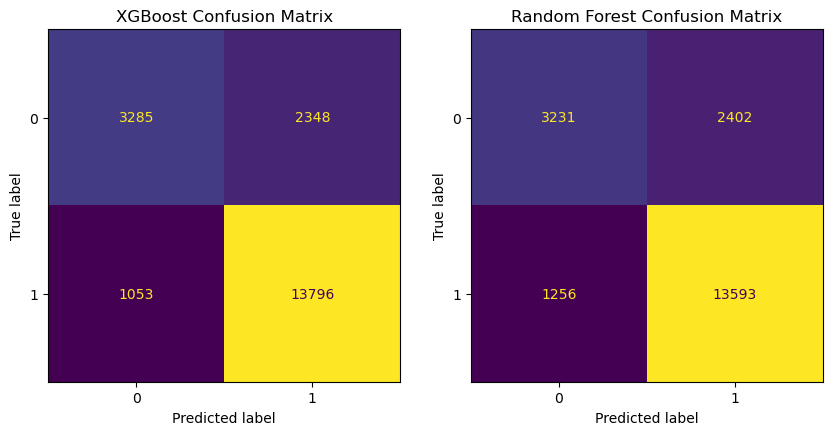


--- XGBoost Feature Importance ---
     Feature  Importance
1    Column1      0.1749
7    Column7      0.1278
17  Column17      0.1228
3    Column3      0.0679
4    Column4      0.0632
19  Column19      0.0513
6    Column6      0.0435
18  Column18      0.0432
14  Column14      0.0348
0    Column0      0.0292
5    Column5      0.0291
8    Column8      0.0279
20  Column20      0.0251
10  Column10      0.0233
12  Column12      0.0218
16  Column16      0.0195
13  Column13      0.0194
11  Column11      0.0181
2    Column2      0.0166
21  Column21      0.0145
15  Column15      0.0140
9    Column9      0.0120

--- Random Forest Feature Importance ---
     Feature  Importance
1    Column1      0.2864
2    Column2      0.2085
7    Column7      0.1078
4    Column4      0.0636
3    Column3      0.0612
8    Column8      0.0571
6    Column6      0.0296
14  Column14      0.0294
17  Column17      0.0283
0    Column0      0.0250
5    Column5      0.0228
18  Column18      0.0157
15  Column15      0.01

In [24]:
build_model(train_df)

## Analyzing variables

### Numeric variables

In [25]:
plt.figure(figsize=(10,10))

hm = sns.heatmap(train_df[numeric_cols].corr(), 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=numeric_cols, 
                 xticklabels=numeric_cols, 
                 cmap="Spectral_r",
                linewidths=.5)
plt.show()

**Column3** and **Column4** are highly correlated. Selecting Column3 as it has comparitively less correlation with other columns than Column4

In [26]:
train_df.drop(columns="Column4", inplace=True)

/var/folders/m7/67q29b3s6rd557f6xm37t3m00000gn/T/ipykernel_38579/708106112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns="Column4", inplace=True)


In [27]:
numeric_cols.remove("Column4")

/var/folders/m7/67q29b3s6rd557f6xm37t3m00000gn/T/ipykernel_38579/4051253293.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[col].clip(upper=train_df[col].quantile(0.99), lower=train_df[col].quantile(0.01)), shade=True, bw_adjust=0.5)
/var/folders/m7/67q29b3s6rd557f6xm37t3m00000gn/T/ipykernel_38579/4051253293.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[col].clip(upper=train_df[col].quantile(0.99), lower=train_df[col].quantile(0.01)), shade=True, bw_adjust=0.5)
/var/folders/m7/67q29b3s6rd557f6xm37t3m00000gn/T/ipykernel_38579/4051253293.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_

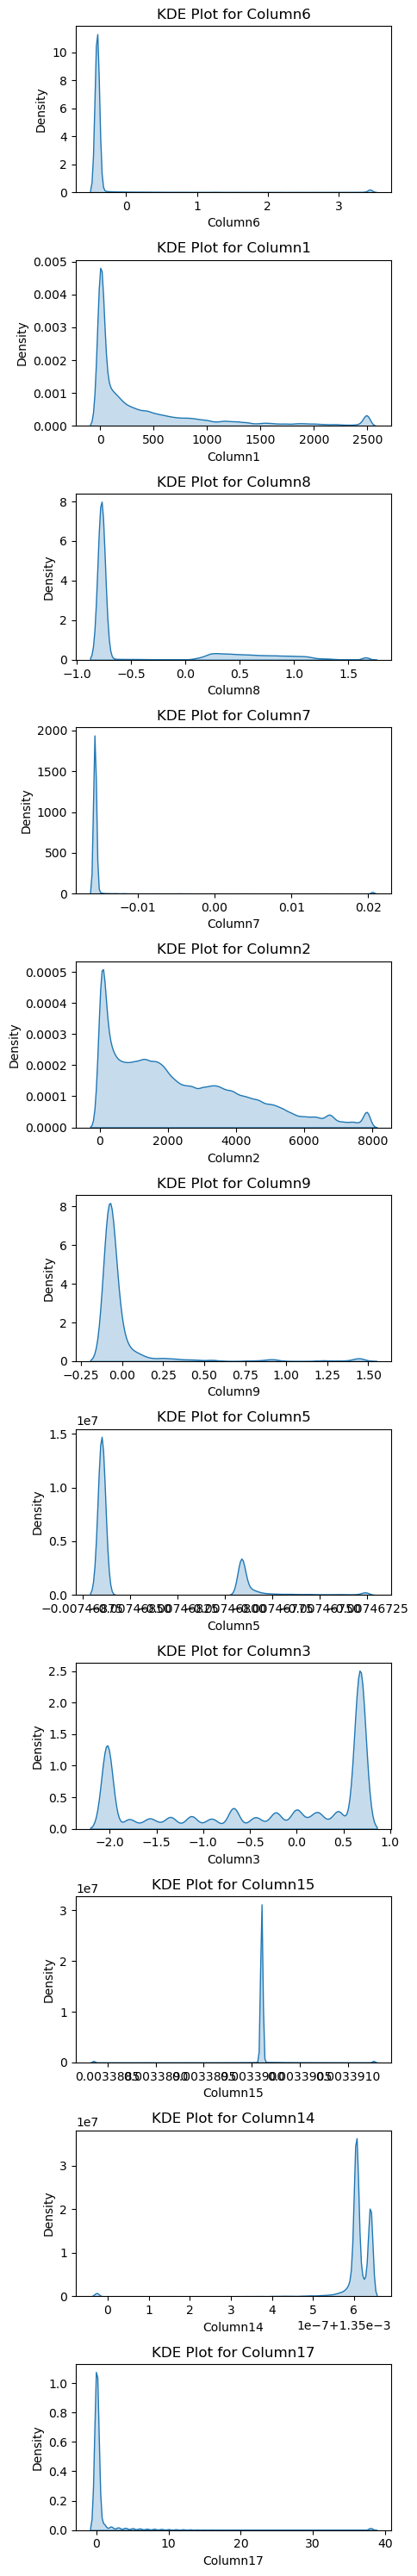

In [28]:
plt.figure(figsize=(5, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.kdeplot(train_df[col].clip(upper=train_df[col].quantile(0.99), lower=train_df[col].quantile(0.01)), shade=True, bw_adjust=0.5)
    plt.title(f'KDE Plot for {col}')

plt.tight_layout()
plt.show()

In [29]:
for col in numeric_cols:
    print(col)
    print(train_df[col].clip(upper=train_df[col].quantile(0.999), lower=train_df[col].quantile(0.001)).describe())
    print()

Column6
count   101073.0000
mean        -0.2655
std          0.6324
min         -0.4079
25%         -0.4079
50%         -0.4079
75%         -0.4079
max          3.4405
Name: Column6, dtype: float64

Column1
count   102407.0000
mean       435.8610
std        632.3853
min        -26.0000
25%          0.0000
50%        144.0000
75%        607.0000
max       2495.0000
Name: Column1, dtype: float64

Column8
count   101073.0000
mean        -0.3437
std          0.7053
min         -0.7750
25%         -0.7750
50%         -0.7750
75%          0.2566
max          2.9238
Name: Column8, dtype: float64

Column7
count   102407.0000
mean        -0.0081
std          0.1603
min         -0.0156
25%         -0.0156
50%         -0.0156
75%         -0.0156
max          4.6961
Name: Column7, dtype: float64

Column2
count   102407.0000
mean      2327.5430
std       1969.7781
min          5.0000
25%        675.0000
50%       1846.0000
75%       3605.0000
max       9032.5940
Name: Column2, dtype: float64

Colum

**T-test**

**Null hypothesis (H0)** - There is no difference b/w numeric values of target==0 and target==1

**Alternate hypothesis (H1)** - There is difference b/w numeric values of target==0 and target==1

In [30]:
# T-test
from scipy import stats

for col in numeric_cols:
    print(f"\n{col}")
    col_df = train_df.dropna(subset=col)
    t_stat, p_value = stats.ttest_ind(col_df[col_df['target']==0][col], col_df[col_df['target']==1][col])

    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value: {p_value:.4f}')


Column6
T-statistic: 44.2782
P-value: 0.0000

Column1
T-statistic: 151.1248
P-value: 0.0000

Column8
T-statistic: 61.1635
P-value: 0.0000

Column7
T-statistic: 15.8096
P-value: 0.0000

Column2
T-statistic: 36.9301
P-value: 0.0000

Column9
T-statistic: 1.9230
P-value: 0.0551

Column5
T-statistic: 0.4822
P-value: 0.6296

Column3
T-statistic: 8.3995
P-value: 0.0000

Column15
T-statistic: 0.8981
P-value: 0.3691

Column14
T-statistic: 0.8021
P-value: 0.4225

Column17
T-statistic: -42.0534
P-value: 0.0000


Dropping columns having p-value>0.05

In [31]:
drop_cols = ["Column5", "Column9", "Column14", "Column15"]
train_df = train_df.drop(columns=drop_cols)

In [32]:
train_df.shape

(102407, 18)

In [33]:
numeric_cols = list(set(numeric_cols) - set(drop_cols))

In [34]:
numeric_cols

['Column1', 'Column6', 'Column8', 'Column3', 'Column17', 'Column7', 'Column2']

In [35]:
lower_bound = train_df[numeric_cols].quantile(0.01)
upper_bound = train_df[numeric_cols].quantile(0.99)

In [36]:
clipped_df = train_df.copy()
for col in numeric_cols:
    clipped_df[col] = clipped_df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

In [37]:
sns.pairplot(clipped_df[numeric_cols + ['target']], hue='target')
plt.show()

We can see some patterns in the above pairplot with **target** variable. 
- Column7 and Column17
- Column6 and Column17
- Column1 and Column17

### Binary variables

In [38]:
binary_cols

['Column10',
 'Column11',
 'Column12',
 'Column13',
 'Column19',
 'Column20',
 'Column21']

In [39]:
for bin_col in binary_cols:
    print(train_df[bin_col].value_counts())

Column10
0    88229
1    14178
Name: count, dtype: int64
Column11
0    80653
1    21754
Name: count, dtype: int64
Column12
0    81185
1    21222
Name: count, dtype: int64
Column13
0    79871
1    22536
Name: count, dtype: int64
Column19
0    91519
1    10888
Name: count, dtype: int64
Column20
0    97352
1     5055
Name: count, dtype: int64
Column21
0    100242
1      2165
Name: count, dtype: int64


**Chi-square test**

**Null hypothesis (H0)** - Binary and target variable are independent.

**Alternate hypothesis (H1)** - Binary and target variable are not independent.

degree of freedom = (m-1)(n-1) = (2-1)(2-1) = 1

In [40]:
alpha = 0.05
dof = 1
critical_value = stats_chi2.ppf(1 - alpha, dof)
critical_value

3.841458820694124

In [41]:
chi2_stats, p_values = chi2(train_df[binary_cols], train_df['target'])

In [42]:
for c, p, bin_col in zip(chi2_stats, p_values, binary_cols):
    print(f"{bin_col}:\ncritical value: {c}\np_value: {p}")
    print("H0 is true" if p >= alpha else "H1 is true")
    print("Keep feature" if c > critical_value else "Drop feature")
    print("\n")

Column10:
critical value: 1373.0795490026978
p_value: 1.4871022154359167e-300
H1 is true
Keep feature


Column11:
critical value: 843.8982707809857
p_value: 1.542058167194213e-185
H1 is true
Keep feature


Column12:
critical value: 1625.9555265036802
p_value: 0.0
H1 is true
Keep feature


Column13:
critical value: 1028.7335988969771
p_value: 1.0202457198051675e-225
H1 is true
Keep feature


Column19:
critical value: 1126.9840533642039
p_value: 4.5094012691921296e-247
H1 is true
Keep feature


Column20:
critical value: 0.9243749593042855
p_value: 0.33632886679545093
H0 is true
Drop feature


Column21:
critical value: 12.240974530039239
p_value: 0.0004675140511809398
H1 is true
Keep feature




H0 holds true for **Column20** and the feature importance of it is low in the model we trained above so we can drop it to improve performance.

In [43]:
train_df.drop(columns="Column20", inplace=True)
binary_cols.remove("Column20")

In [44]:
binary_cols

['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column21']

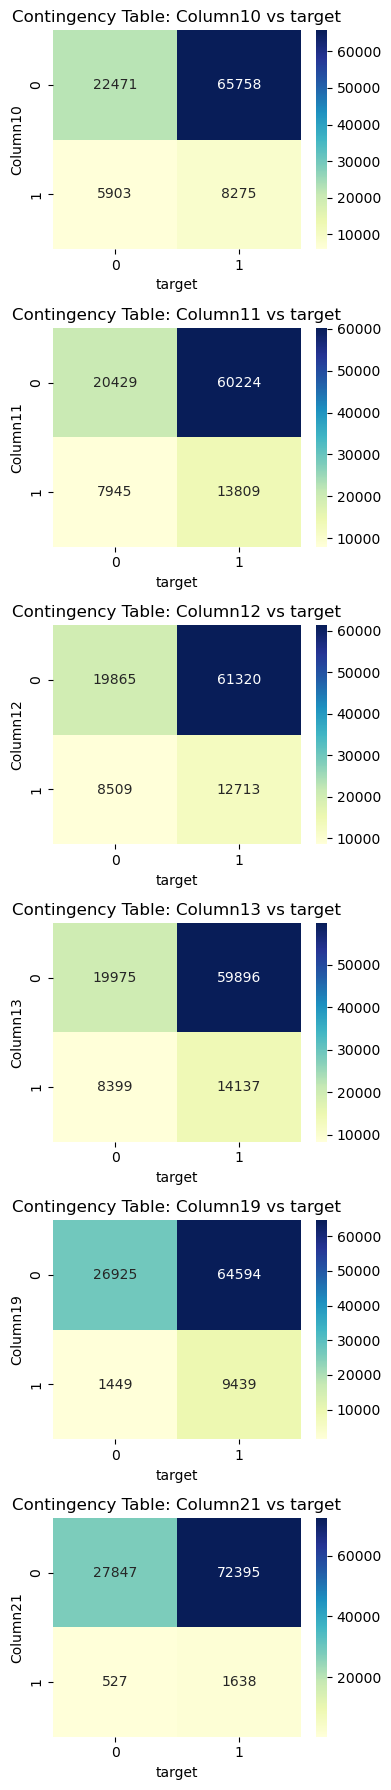

In [45]:
num_plots = len(binary_cols)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(4, 3 * num_plots))

for ax, col in zip(axes, binary_cols):
    contingency_table = pd.crosstab(train_df[col], train_df['target'])
    
    # Create a heatmap
    sns.heatmap(contingency_table, annot=True, fmt='g', cmap='YlGnBu', ax=ax)
    ax.set_title(f'Contingency Table: {col} vs target')
    ax.set_xlabel('target')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

### Categorical variables

In [46]:
cat_cols

['Column0', 'Column16', 'Column18']

In [47]:
train_df[cat_cols].nunique()

Column0     16
Column16     3
Column18    10
dtype: int64

In [48]:
for cat_col in cat_cols:
    print(train_df[cat_col].value_counts())
    print()

Column0
0.0000     86669
1.0000      8302
2.0000      4931
4.0000      1379
5.0000       443
6.0000       287
7.0000       158
3.0000       138
11.0000       57
12.0000       14
9.0000        12
10.0000        5
15.0000        4
8.0000         4
14.0000        3
13.0000        1
Name: count, dtype: int64

Column16
0.0000    101464
1.0000       939
2.0000         4
Name: count, dtype: int64

Column18
1.0000     93602
2.0000      6221
3.0000      1508
4.0000       510
5.0000       256
6.0000       128
7.0000        80
8.0000        68
9.0000        27
12.0000        7
Name: count, dtype: int64



In [49]:
num_plots = len(cat_cols)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 5 * num_plots))

for ax, col in zip(axes, cat_cols):
    contingency_table = pd.crosstab(train_df[col], train_df['target'])
    
    # Create a heatmap
    sns.heatmap(contingency_table, annot=True, fmt='g', cmap='YlGnBu', ax=ax)
    ax.set_title(f'Contingency Table: {col} vs target')
    ax.set_xlabel('target')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

Performing **Chi-square teset**

**dof:**

Column0 = (16-1)(2-1) = 15

Column16 = (3-1)(2-1) = 2

Column18 = (10-1)(2-1) = 9

In [50]:
alpha = 0.05

In [51]:
# Column0
dof = 15
critical_value = stats_chi2.ppf(1 - alpha, dof)
critical_value

24.995790139728616

In [52]:
chi2_stats, p_value = chi2(train_df[["Column0"]], train_df['target'])

In [53]:
print(f"Critical value: {chi2_stats}\np_value: {p_value}")

Critical value: [6831.16400648]
p_value: [0.]


In [54]:
# Column16
dof = 2
critical_value = stats_chi2.ppf(1 - alpha, dof)
critical_value

5.991464547107979

In [55]:
chi2_stats, p_value = chi2(train_df[["Column16"]], train_df['target'])

In [56]:
print(f"Critical value: {chi2_stats}\np_value: {p_value}")

Critical value: [57.4445879]
p_value: [3.47636452e-14]


In [57]:
# Column18
dof = 9
critical_value = stats_chi2.ppf(1 - alpha, dof)
critical_value

16.918977604620448

In [58]:
chi2_stats, p_value = chi2(train_df[["Column18"]], train_df['target'])

In [59]:
print(f"Critical value: {chi2_stats}\np_value: {p_value}")

Critical value: [48.5653655]
p_value: [3.19461496e-12]


In [60]:
train_df.shape

(102407, 17)

## Feature engineering

**1. Extended null value imputation** - Creating binary features that indicate whether the values in a column are null or not.

In [61]:
train_df.isnull().sum()

Column0         0
Column1         0
Column2         0
Column3     42407
Column6      1334
Column7         0
Column8      1334
Column10        0
Column11        0
Column12        0
Column13        0
Column16        0
Column17        0
Column18        0
Column19        0
Column21        0
target          0
dtype: int64

In [62]:
null_columns = ['Column3', 'Column6', 'Column8']

In [63]:
for col in null_columns:
    train_df[f"Null_{col}"] = train_df[col].isnull().astype(int)

In [64]:
train_df[train_df['Null_Column8']!=train_df['Null_Column6']]

Empty DataFrame
Columns: [Column0, Column1, Column2, Column3, Column6, Column7, Column8, Column10, Column11, Column12, Column13, Column16, Column17, Column18, Column19, Column21, target, Null_Column3, Null_Column6, Null_Column8]
Index: []

In [65]:
train_df.drop(columns='Null_Column8', inplace=True)
train_df.rename(columns={'Null_Column6': 'Null_Column_6_8'}, inplace=True)

**Chi-square test**

**Null hypothesis (H0)** - Binary and target variable are independent.

**Alternate hypothesis (H1)** - Binary and target variable are not independent.

degree of freedom = (m-1)(n-1) = (2-1)(2-1) = 1

In [66]:
alpha = 0.05
dof = 1
critical_value = stats_chi2.ppf(1 - alpha, dof)
critical_value

3.841458820694124

In [67]:
chi2_stats, p_values = chi2(train_df[['Null_Column3', 'Null_Column_6_8']], train_df['target'])

In [68]:
for c, p, bin_col in zip(chi2_stats, p_values, ['Null_Column3', 'Null_Column_6_8']):
    print(f"{bin_col}:\ncritical value: {c}\np_value: {p}")
    print("H0 is true" if p >= alpha else "H1 is true")
    print("Keep feature" if c > critical_value else "Drop feature")
    print("\n")

Null_Column3:
critical value: 5146.4542953668215
p_value: 0.0
H1 is true
Keep feature


Null_Column_6_8:
critical value: 729.1173576998652
p_value: 1.3935583980732115e-160
H1 is true
Keep feature




In [69]:
pd.crosstab(index=train_df['Null_Column3'], columns=train_df['target'])

target            0      1
Null_Column3              
0             23236  36764
1              5138  37269

In [70]:
pd.crosstab(index=train_df['Null_Column_6_8'], columns=train_df['target'])

target               0      1
Null_Column_6_8              
0                27563  73510
1                  811    523

### Filling Null values

In [71]:
plt.figure(figsize=(5, 20))

for i, col in enumerate(null_columns, 1):
    uq = train_df[col].quantile(0.99)
    lq = train_df[col].quantile(0.01)
    plt.subplot(len(numeric_cols), 1, i)
    sns.kdeplot(train_df[col].clip(upper=uq, lower=lq), fill=True, bw_adjust=0.5)
    plt.title(f'KDE Plot for {col}')

plt.tight_layout()
plt.show()

- Since null values in Column6 and Column8 are very less and the data is highly skewed the null values would be replaced with mode.
- Null values in Column3 would be replaced by mean

In [72]:
train_df['Column6'].fillna(train_df["Column6"].round(2).mode()[0], inplace=True)
train_df['Column8'].fillna(train_df["Column8"].round(2).mode()[0], inplace=True)
train_df['Column3'].fillna(train_df["Column3"].mean(), inplace=True)

**2. Binning values** - We saw in pairplot relation b/w numeric values with target. Extracting features from those values

***Note***: *These features are purely based on my observation and speculations*

**Binary separation**
- Column6 and Column17
- Column7 and Column17
- Column7 and Column17


For binary segmentation I would be using **Logistic regression**

In [73]:
def binary_separation(df, f1, f2):
    X = df[[f1, f2]]
    y = df['target']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', report)
    
    return model.predict(X_scaled)

In [74]:
numeric_cols

['Column1', 'Column6', 'Column8', 'Column3', 'Column17', 'Column7', 'Column2']

In [75]:
lower_bound = train_df[numeric_cols].quantile(0.01)
upper_bound = train_df[numeric_cols].quantile(0.99)

In [76]:
clipped_df = train_df.copy()
for col in numeric_cols:
    clipped_df[col] = clipped_df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

In [77]:
train_df['Column6_vs_17'] = binary_separation(clipped_df, "Column6", "Column17")

Accuracy: 0.7276633141294795

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.06      0.10      5633
           1       0.73      0.98      0.84     14849

    accuracy                           0.73     20482
   macro avg       0.64      0.52      0.47     20482
weighted avg       0.68      0.73      0.64     20482



In [78]:
train_df['Column7_vs_17'] = binary_separation(clipped_df, "Column17", "Column7")

Accuracy: 0.7448979591836735

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.08      0.14      5633
           1       0.74      1.00      0.85     14849

    accuracy                           0.74     20482
   macro avg       0.84      0.54      0.50     20482
weighted avg       0.80      0.74      0.66     20482



In [79]:
train_df['Column1_vs_17'] = binary_separation(clipped_df, "Column17", "Column1")

Accuracy: 0.7554926276730788

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.29      0.39      5633
           1       0.78      0.93      0.85     14849

    accuracy                           0.76     20482
   macro avg       0.70      0.61      0.62     20482
weighted avg       0.73      0.76      0.72     20482



**3. PCA** - Applying pca on numeric columns

In [80]:
train_df.nunique()

Column0               16
Column1             2522
Column2             8196
Column3               48
Column6            10358
Column7            12248
Column8            31458
Column10               2
Column11               2
Column12               2
Column13               2
Column16               3
Column17             152
Column18              10
Column19               2
Column21               2
target                 2
Null_Column3           2
Null_Column_6_8        2
Column6_vs_17          2
Column7_vs_17          2
Column1_vs_17          2
dtype: int64

In [81]:
numeric_cols = ['Column1', 'Column2', 'Column3', 'Column6', 'Column7', 'Column8', 'Column17']

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df[numeric_cols])
y = train_df['target']

In [83]:
num_components_range = range(1, 8)
mean_scores = []

for num_components in num_components_range:
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)
    
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False
    )
    scores = cross_val_score(model, X_pca, y, cv=5)
    mean_scores.append(np.mean(scores))

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` i

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [84]:
plt.figure(figsize=(10, 6))
plt.plot(num_components_range, mean_scores, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Cross-Validation Score by Number of Principal Components')
plt.grid(True)
plt.show()

optimal_num_components = num_components_range[np.argmax(mean_scores)]
print(f'Optimal number of components based on cross-validation: {optimal_num_components}')

Optimal number of components based on cross-validation: 6


No improvement applying PCA

## Feature selection

In [85]:
estimator = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False
)

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [86]:
selector = RFECV(estimator, cv=5) 
selector = selector.fit(train_df.drop(columns='target'), train_df['target']) 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` i

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` i

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` i

In [87]:
print("Optimal number of features: %d" % selector.n_features_)  
print("Selected features: %s" % selector.support_) 

Optimal number of features: 17
Selected features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False]


In [88]:
train_df.drop(columns='target').columns

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column6', 'Column7',
       'Column8', 'Column10', 'Column11', 'Column12', 'Column13', 'Column16',
       'Column17', 'Column18', 'Column19', 'Column21', 'Null_Column3',
       'Null_Column_6_8', 'Column6_vs_17', 'Column7_vs_17', 'Column1_vs_17'],
      dtype='object')

Dropping **Null_Column_6_8, Column6_vs_17, Column7_vs_17, Column1_vs_17** 

In [89]:
train_df.drop(columns=['Null_Column_6_8', 'Column6_vs_17', 'Column7_vs_17', 'Column1_vs_17'], inplace=True)

## Hyperparameter tuning

**1. XGBoost**

In [90]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [91]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [92]:
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',  # or 'f1', 'roc_auc', etc.
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1) 

In [93]:
X_train, y_train = train_df.drop(columns='target'), train_df['target']

In [94]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [95]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation score:  0.8875799461242577


**2. RandomForestClassifier**

In [96]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [97]:
rf = RandomForestClassifier(random_state=42)

In [98]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  14.7s
[CV] END max_depth=None, m

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  31.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  15.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   7.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   7.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  14.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=33.0min
[CV] END max_depth=None, m

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  14.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   7.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  15.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   6.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  14.2s
[CV] END max_depth=None, m

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [99]:
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score: ", grid_search_rf.best_score_)

Best parameters found:  {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score:  0.8842753042519232


**3. KNN**

In [100]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [101]:
knn = KNeighborsClassifier()

In [102]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)

grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  14.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   7.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, 

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   7.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   6.9s
[CV] END max_depth=None, m

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  31.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=79.9min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=32.9min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time= 4.0min
[CV] END max_depth=None

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  31.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  30.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=79.9min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=32.9min
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=141.3min
[CV] END max_depth=No

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=2)

In [103]:
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best cross-validation score: ", grid_search_knn.best_score_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation score:  0.8484922827921283


## Ensemble model

In [104]:
ensemble_model = VotingClassifier(estimators=[('knn', grid_search_knn), ('xgb', grid_search), 
                                              ('rf', grid_search_rf)], 
                                  voting = 'hard')

## Creating test data

In [105]:
X_train.columns

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column6', 'Column7',
       'Column8', 'Column10', 'Column11', 'Column12', 'Column13', 'Column16',
       'Column17', 'Column18', 'Column19', 'Column21', 'Null_Column3'],
      dtype='object')

In [106]:
df_final_test.isnull().sum()

ID               0
Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

## Final model

In [116]:
class CustomModel:
    def __init__(self):
        self.selected_cols = ['Column0', 'Column1', 'Column2', 'Column3', 'Column6', 'Column7', 
                              'Column8', 'Column10', 'Column11', 'Column12', 'Column13', 'Column16',
                              'Column17', 'Column18', 'Column19', 'Column21', 'Null_Column3']

        self.knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15, weights= 'uniform')
        self.xgb = xgb.XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 7, n_estimators= 100, subsample= 1.0)
        self.rf = RandomForestClassifier(max_depth= 20, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 10, n_estimators= 200)
        
        # Create the voting ensemble
        self.ensemble_model = VotingClassifier(
            estimators=[
                ('knn', self.knn),
                ('xgb', self.xgb),
                ('rf', self.rf)
            ],
            voting='soft'
        )
        self.trained = False

    def create_dataset(self, df):
        df['Null_Column3'] = df['Column3'].isnull().astype(int)
        df = df[self.selected_cols]
        
        df.loc[df['Column18']!=0, "Column8"] = df[df['Column18']!=0]['Column8'].round(2).mode()
        df.loc[df['Column18']!=0, "Column6"] = df[df['Column18']!=0]['Column6'].round(2).mode()
        df.loc[df['Column18']!=0, "Column3"] = df[df['Column18']!=0]['Column3'].mean()

        # Since rest of the null values will have no impact on prediction as Column18==0, I am making them 0.
        df = df.fillna(0)
        return df
    
    def fit(self, X, y):
        if "Column18" not in X.columns:
            raise Exception("Column18 not present in data.")
        X = X[X['Column18']!=0]
        self.ensemble_model.fit(X, y)
        self.trained = True

    def predict(self, X):
        if "Column18" not in X.columns:
            raise Exception("Column18 not present in data.")
        if not self.trained:
            raise Exception("Model not trained. Call fit() before predict().")

        ind = list(X[X['Column18']==0].index)
        y_pred = self.ensemble_model.predict(X)
        y_pred[ind] = 0
        return y_pred
    
    def predict_proba(self, X):
        if "Column18" not in X.columns:
            raise Exception("Column18 not present in data.")
        if not self.trained:
            raise Exception("Model not trained. Call fit() before predict().")

        ind = list(X[X['Column18']==0].index)
        y_pred_proba = self.ensemble_model.predict_proba(X)
        
        # This is done because we are certain that when Column18 = 0 the target would be 0.
        y_pred_proba[ind, 1] = 0
        y_pred_proba[ind, 0] = 1
        return y_pred_proba

In [117]:
custom_model = CustomModel()

In [118]:
custom_model.fit(X_train, y_train)

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


## Saving model

In [119]:
import pickle

In [120]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(custom_model, model_file)

### Prediction on testing data

In [121]:
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [122]:
df_final_test = model.create_dataset(df_final_test)

In [123]:
df_final_test['Null_Column3'].sum()

0

In [124]:
y_pred = model.predict(df_final_test)
y_pred_proba = model.predict_proba(df_final_test)

In [133]:
accuracy = accuracy_score(y_final_test['target'], y_pred)*100
precision = precision_score(y_final_test['target'], y_pred)
recall = recall_score(y_final_test['target'], y_pred)
f1 = f1_score(y_final_test['target'], y_pred)
auc_roc = roc_auc_score(y_final_test['target'], y_pred_proba[:, 1])

In [134]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 97.2863
Precision: 0.7835
Recall: 0.9841
F1 Score: 0.8724
AUC-ROC: 0.9930


In [128]:
print(classification_report(y_final_test['target'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.78      0.98      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712



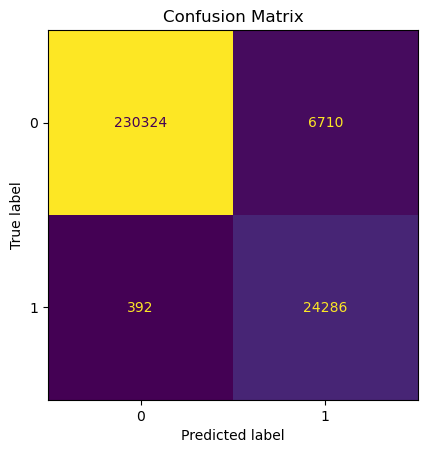

In [129]:
cm = confusion_matrix(y_final_test['target'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(colorbar=False)
plt.title('Confusion Matrix')
plt.show()

#### Incorrectly classified target = 0 labels percent


$$
\frac{6710}{230324+6710} \times 100 = 2.8\%
$$

#### Incorrectly classified target = 1 labels percent


$$
\frac{392}{24286+392} \times 100 = 1.58\%
$$

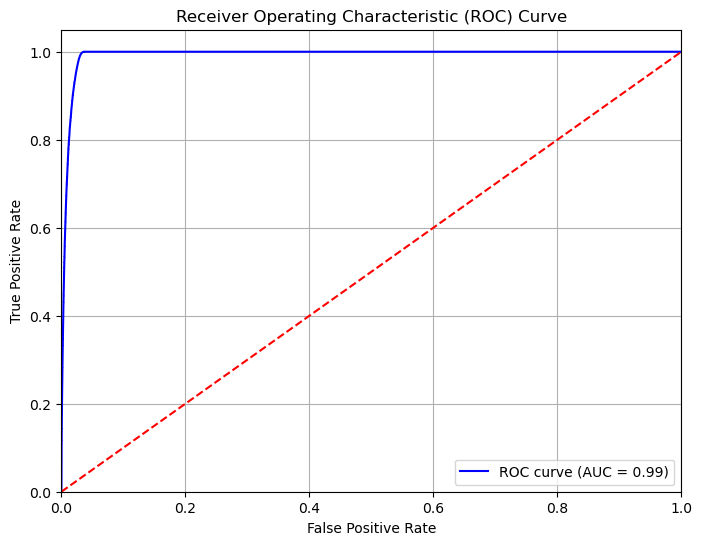

In [130]:
fpr, tpr, thresholds = roc_curve(y_final_test['target'], y_pred_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()